# INFSCI0310 Computation in Information Science
# Department of Computer Science, SCUPI

# Assignment 2: Stochastic Thinking, Simulation and Sampling
# Due on: Wednesday, November 27th, 23:59 pm

Welcome to assignment 2, where we will explore more about stochastic process and simulation. <br>


# Data files for this assignment
In order to get hand on the assignment, you have to download the data files and allocate them into the correct directory as follows:

```
├── [your working directory]
   ├── united_summer2015.csv
```

**Please make sure to use the correct path to these files when working on your own machine. Recall that the jupyter *.ipynb file (this assignment file) should be in your working directory.**

# 1. Deterministic or Stochastic

The definitions of **deterministic process** and **stochastic process** are presented as follows:

A **deterministic process** is a process *whose behavior is entirely predictable. Each state is uniquely determined by parameters in the process and by previous states of its variables.* This means the process will *perform the same way given a particular set of initial conditions, allowing precise prediction of future states.*

A **stochastic process** is a process in which *randomness is present, meaning that variable states are represented by probability distributions rather than unique values.* The behavior of this process *cannot be fully predicted, as each state is influenced by probabilistic factors, leading to variability in outcomes.*

For example, run the following python code, in multiple times, what can you observe from the results?

In [1]:
import random
for i in range(0, 10):
    a = random.randint(0,10)
    print("a: " + str(a))

a: 3
a: 3
a: 9
a: 6
a: 4
a: 7
a: 3
a: 8
a: 6
a: 10


Modify the code by adding a new line of *random.seed(0)*, now run the code in multiple times, what can you observe from the results?

In [2]:
import random
random.seed(0)
for i in range(0, 10):
    a = random.randint(0,10)
    print("a: " + str(a))

a: 6
a: 6
a: 0
a: 4
a: 8
a: 7
a: 6
a: 4
a: 7
a: 5


In the previous example, *random.seed(x)* initialize the random generator using the seed *x* (i.e., a constant), the random generator will be set as a deterministic system, i.e., it will output the same samples . <br>

Such a tenique is very useful for reproduction purposes, where you will produce relative consistent results across running the system in multiple times, it also benefits the general public to repeat your experiments and validate the results that you claimed in your report. <br>

Many computational libraries in Python also provide *seed(x)* functions, e.g., *numpy.random.seed(x)* in *Numpy*, *torch.seed(x)* in *PyTorch*.

## <font color='red'>Exercise 1 (20 marks) </font>
In Exercise 1, you need to use *random.seed(x)* and *random.randint(a,b)* to code the following tasks, and print out the results: <br>
1. Deterministically generate and return 5 even number between 9 and 21. <br>
2. Then shuffle the deterministical generator to a stochastic generator, and return 5 even number between 9 and 21.

In [36]:
# Exercise 1
import random
random.seed(0)

# 生成9到21之间的5个偶数
even_numbers1 = []
while len(even_numbers1) < 5:
    a = random.randint(9, 21)
    if a % 2 == 0:
        even_numbers1.append(a)

print(even_numbers1)


random.seed()
even_numbers2 = []
while len(even_numbers2) < 5:
    a = random.randint(9, 21)
    if a % 2 == 0:
        even_numbers2.append(a)

print(even_numbers2)


[16, 16, 14, 18, 12]
[10, 20, 20, 12, 20]


# 2. Monte Carlo Simulation

Monte Carlo simulation refers to simulation processes that use random sampling to estimate statistical properties or outcomes in complex systems.

## <font color='red'>Exercise 2 (30 marks) </font>
In Exercise 2, you need to code a monte carlo simulation system and answer several questions, more specifically: <br>

You have a bucket with 5 red balls and 5 green balls. Now you will draw 5 balls from the bucket, assume that each time you draw a ball out of the bucket without putting it back to the bucket, i.e., non-repetitive drawing:

1. Set *random.seed(1)* and respectively perform the simulation (draw 5 balls) 10, 100, 1000, 10000, 100000 times, and print the fraction values of "getting 5 balls with the same color" when you perform the simulation 1, 10, 100, 1000, 10000, 100000 times, respectively.
2. Compare each fraction value with the probability of getting 5 balls with the same color (calculated mathematically on your own), what can you find?

In [55]:
import random

def draw_balls():
    # 初始化桶中的球
    bucket = ['red'] * 5 + ['green'] * 5
    random.shuffle(bucket)
    # 抽取5个球
    drawn_balls = [bucket.pop() for _ in range(5)]
    return drawn_balls

def monte_carlo_simulation(num_simulations):
    same_color_count = 0
    for _ in range(num_simulations):
        drawn_balls = draw_balls()
        if all(ball == 'red' for ball in drawn_balls) or all(ball == 'green' for ball in drawn_balls):
            same_color_count += 1
    return same_color_count / num_simulations

# 设置随机数种子
random.seed(1)

# 不同模拟次数
simulation_counts = [1, 10, 100, 1000, 10000, 100000]

# 进行模拟并打印结果
for count in simulation_counts:
    fraction = monte_carlo_simulation(count)
    print(f"Simulation count: {count}, Fraction of same color: {fraction}")
    
print(2/((10*9*8*7*6)/(5*4*3*2*1)))
    
# I find that the fraction of the same color is close to 0.00793, which is the expected value.

Simulation count: 1, Fraction of same color: 1.0
Simulation count: 10, Fraction of same color: 0.1
Simulation count: 100, Fraction of same color: 0.0
Simulation count: 1000, Fraction of same color: 0.007
Simulation count: 10000, Fraction of same color: 0.0078
Simulation count: 100000, Fraction of same color: 0.00805
0.007936507936507936


# 3. The Central Limit Theorem
**The Central Limit Theorem says that:** <br>
*1. The probability distribution of the sum or average of enough number of random samples drawn with replacement will be normally distributed.* <br>
*2. The mean of such normal distribution will be very close to the population mean, regardless of how the population distribution looks like.* <br>

The saying: *"regardless of how the population distribution looks like"* fits our need, because in data science we are often blind with the population distribution.

The Central Limit Theorem makes it possible to make inferences with very little knowledge about the population, provided we have a enough random samples.

Next, we will demostrate the Central Limit Theorem via a experiment:

The excel file *united_summer2015.csv* contains data regarding the departure delays of 13,825 United Airlines domestic flights out of San Francisco airport in the summer of 2015. We use *pandas* to read the excel file as a dataframe, and print a view of the dataframe:

In [56]:
import pandas as pd
united = pd.read_csv('./united_summer2015.csv', header=0)
print(united)

          Date  Flight Number Destination  Delay
0       6/1/15             73         HNL    257
1       6/1/15            217         EWR     28
2       6/1/15            237         STL     -3
3       6/1/15            250         SAN      0
4       6/1/15            267         PHL     64
...        ...            ...         ...    ...
13820  8/31/15           1978         LAS     -4
13821  8/31/15           1993         IAD      8
13822  8/31/15           1994         ORD      3
13823  8/31/15           2000         PHX     -1
13824  8/31/15           2013         EWR     -2

[13825 rows x 4 columns]


Next, we focus on the Delay data (in minutes), regard all the Delay data in the dataframe as our population, and try to use random sampling to generate a very basic understanding of the whole population.

First, we plot the distribution of the Delay data in the dataframe via *pandas.DataFrame.hist()* method, i.e., using a histogram. <br>
**Note** that this is usually infeasible in real-case, as the size of the whole population is often too large to provide such a distribution visualization.

Text(0, 0.5, 'Count')

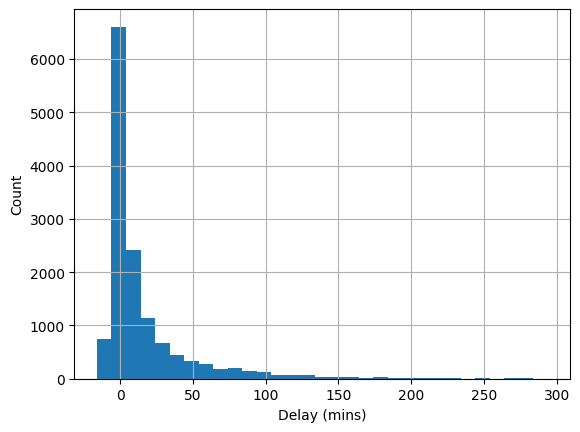

In [57]:
import matplotlib.pyplot as plt
import numpy as np
united['Delay'].hist(bins=np.arange(united['Delay'].min(), 300, 10))
plt.xlabel('Delay (mins)') 
plt.ylabel('Count') 

As we can see from the histogram, the distribution of delays has a long right-hand tail. Let's find out the mean and standard deviation of this distribution:

In [58]:
mean = united['Delay'].mean()
std = united['Delay'].std()
print(mean, std)

16.658155515370705 39.48162778440366


So the mean is around 16.6, standard deviation is around 39.5 <br>
These numbers will be our ground truth to compare with.

Next, we assume that accessing the whole population (all 13824 Delay data) is not possible, if we want to understand the population, we have to randomly sample a subset and hopefully these samples can reflect the characteristics of the whole population, then analyze the samples in our subset.

Let's sample 400 Delay data from the population, and calculate the mean and standard deviation:

          Date  Flight Number Destination  Delay
0       6/1/15             73         HNL    257
1       6/1/15            217         EWR     28
2       6/1/15            237         STL     -3
3       6/1/15            250         SAN      0
4       6/1/15            267         PHL     64
...        ...            ...         ...    ...
13820  8/31/15           1978         LAS     -4
13821  8/31/15           1993         IAD      8
13822  8/31/15           1994         ORD      3
13823  8/31/15           2000         PHX     -1
13824  8/31/15           2013         EWR     -2

[13825 rows x 4 columns]
18.5225 44.873249437026445


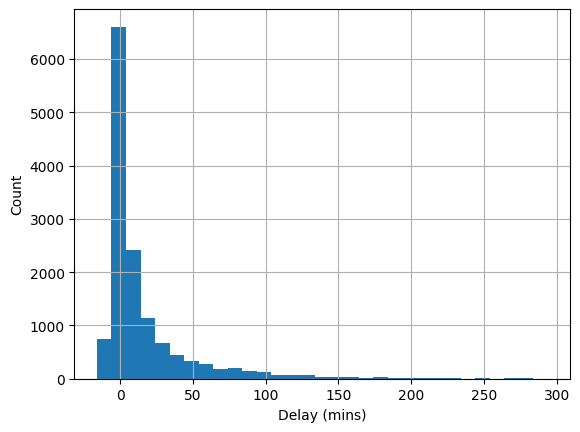

In [ ]:
delay_400 = united['Delay'].sample(400)
print(delay_400.mean(), delay_400.std())

As you can see we did NOT fix the seed here, so the process is stochastic. <br>
Feel free to run this multiple times, where the results should vary. How often can you get the subset's mean and standard deviation as close as the population's ground truth (16.6, 39.5)?

## <font color='red'>Exercise 3 (50 marks)</font>

Previously, you run the random sampling multiple times and produce measurements to compare with population's ground truth statistics.
That is exactly the **Central Limit Theorem** tells us to do: <br>
*- As long as we randomly sample enough data from the population, and perform such sampling experiments in multiple times.* <br>
*- We can demonstrate the population mean from the distribution of sample mean values, formed by calculating mean values from all these sampling experiments.*

Following the instructions from the **Central Limit Theorem**, please complete the following tasks: <br>
1. Use the code we have written down for the experiment of sampling 400 Delay data, perform such experiment 10000 times <br>
2. Plot the distribution of sample mean values using a histogram, where each bin account for 0.5 value range <br>
3. Fix the experiment number 10000, while change the sample number from 400 to 1000, then plot the distribution histogram again <br>
4. Answer two questions: What can you find from the first histogram? What can you find by comparing between these two histograms? <br>
<font color="red">Please use Markdown cells to structure your text.</font>

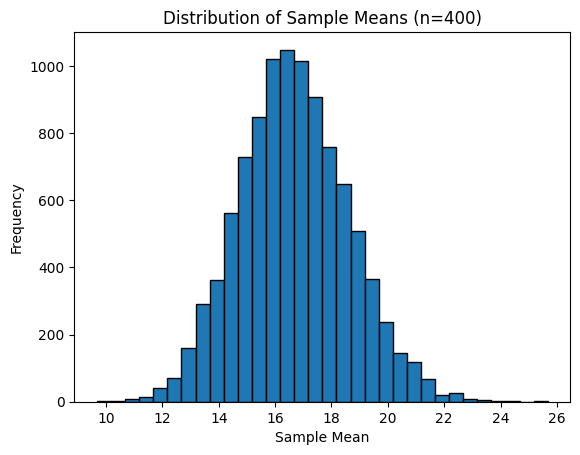

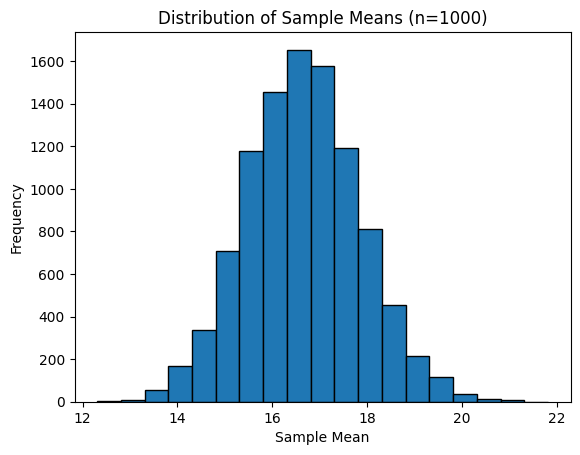

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 读取数据
united = pd.read_csv('./united_summer2015.csv', header=0)

# 进行10000次实验，每次抽取400个样本
means_400 = []
for i in range(10000):
    delay_sample = united['Delay'].sample(400)
    means_400.append(delay_sample.mean())

# 绘制样本平均值的直方图，每个bin代表0.5的值范围
plt.hist(means_400, bins=np.arange(min(means_400), max(means_400) + 0.5, 0.5), edgecolor='black')
plt.title('Distribution of Sample Means (n=400)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

# 进行10000次实验，每次抽取1000个样本
means_1000 = []
for i in range(10000):
    delay_sample = united['Delay'].sample(1000)
    means_1000.append(delay_sample.mean())

# 绘制样本平均值的直方图，每个bin代表0.5的值范围
plt.hist(means_1000, bins=np.arange(min(means_1000), max(means_1000) + 0.5, 0.5), edgecolor='black')
plt.title('Distribution of Sample Means (n=1000)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

1. As you can see from the first histogram, the distribution of the sample means takes on the shape of a normal distribution
2. By comparing the two histograms, it can be found that when the number of samples increases from 400 to 1000, the distribution of the sample mean becomes more concentrated, that is, the standard deviation will decrease

## <font color='blue'>Submission</font>

You only need to submit the jupyter file in **ipynb** format, rename it as: A2_YOURID_YOURNAME (For instance: A2_2023141520000_Sofia) <br>